# Sales Data Analysis
Comprehensive analysis of sales performance data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create sample sales data
np.random.seed(123)
dates = pd.date_range('2023-01-01', periods=365, freq='D')
sales_data = pd.DataFrame({
    'Date': dates,
    'Sales': np.random.normal(1000, 200, 365) + np.sin(np.arange(365) * 2 * np.pi / 7) * 100,
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 365),
    'Product': np.random.choice(['A', 'B', 'C', 'D'], 365)
})

print("Sales Data Overview:")
print(sales_data.head())
print(f"\nTotal records: {len(sales_data)}")
print(f"Date range: {sales_data['Date'].min()} to {sales_data['Date'].max()}")

Sales Data Overview:
        Date        Sales Region Product
0 2023-01-01   782.873879  South       C
1 2023-01-02  1277.652238   West       D
2 2023-01-03  1154.088491  South       C
3 2023-01-04   742.129431   West       C
4 2023-01-05   840.891576  North       D

Total records: 365
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00


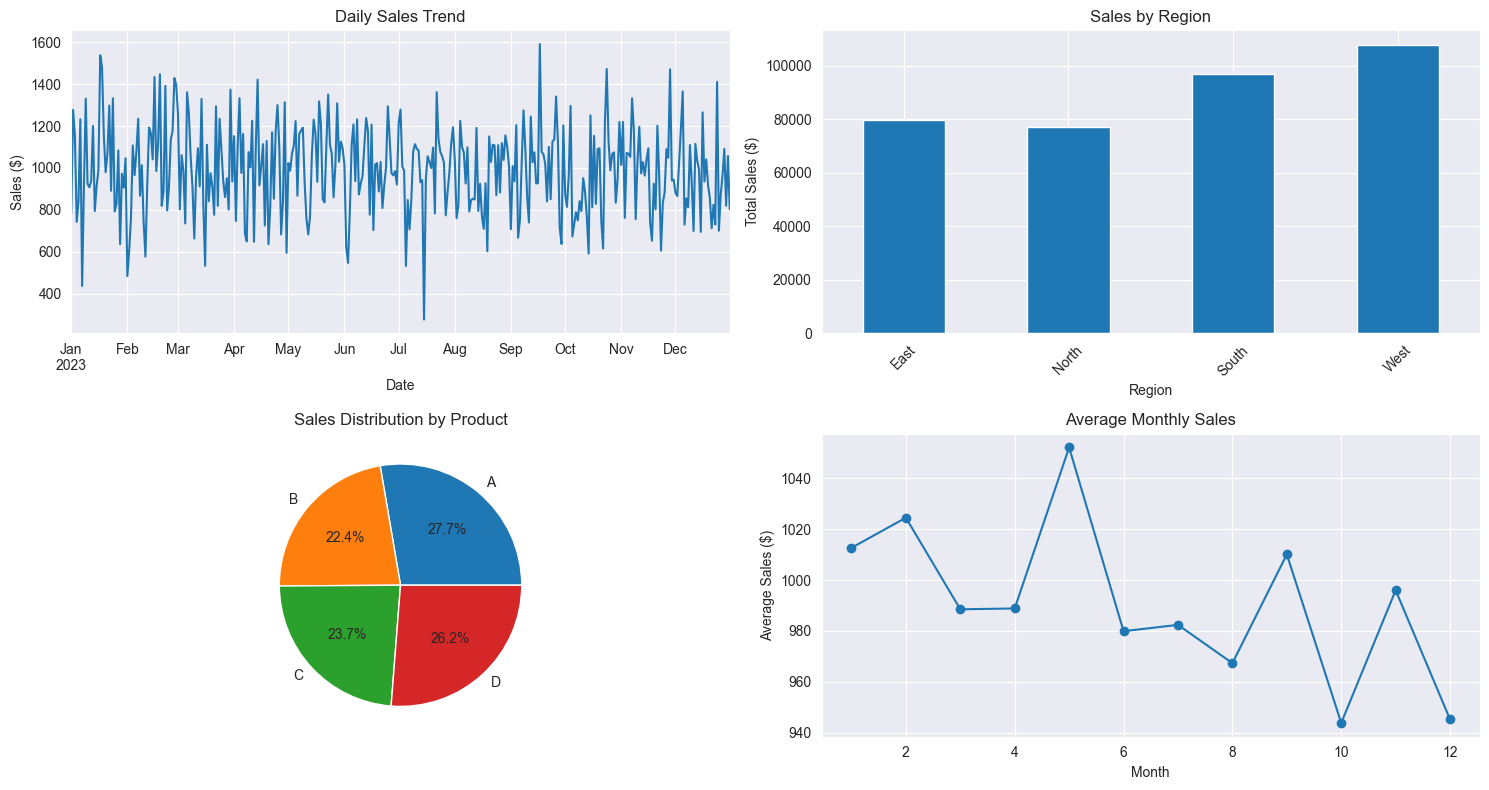

In [2]:
# Sales trend over time
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sales_data.set_index('Date')['Sales'].plot()
plt.title('Daily Sales Trend')
plt.ylabel('Sales ($)')

# Sales by region
plt.subplot(2, 2, 2)
region_sales = sales_data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Sales by product
plt.subplot(2, 2, 3)
product_sales = sales_data.groupby('Product')['Sales'].sum()
product_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Product')
plt.ylabel('')

# Monthly sales trend
plt.subplot(2, 2, 4)
monthly_sales = sales_data.groupby(sales_data['Date'].dt.month)['Sales'].mean()
monthly_sales.plot(kind='line', marker='o')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')

plt.tight_layout()
plt.show()

In [3]:
# Summary statistics table
summary_stats = sales_data.groupby('Region')['Sales'].agg([
    'count', 'mean', 'std', 'min', 'max', 'sum'
]).round(2)

print("Sales Summary by Region:")
print(summary_stats)

Sales Summary by Region:
        count     mean     std     min      max        sum
Region                                                    
East       79  1009.85  222.84  483.67  1591.73   79778.02
North      81   950.31  177.70  576.28  1341.29   76974.90
South      97   999.95  229.51  275.61  1538.68   96995.60
West      108   998.46  203.82  531.98  1472.65  107833.29
